In [140]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from mpl_toolkits.mplot3d import Axes3D
#red neuronal con skearn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
# red neuronal con keras
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set()
gnb = GaussianNB()



In [141]:
Corazon = pd.read_csv("HeartDisease.csv")
prueba = pd.read_csv("HeartDisease.csv")

In [142]:
Corazon.shape

(457, 13)

In [143]:
Corazon.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0,Hungary
1,2,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0,Hungary
2,3,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0,Hungary
3,4,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0,Hungary
4,5,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0,Hungary


In [144]:
prueba.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0,Hungary
1,2,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0,Hungary
2,3,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0,Hungary
3,4,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0,Hungary
4,5,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0,Hungary


# Definimos la variables Categoricas y Numericas

In [145]:
var_numericas = Corazon[['Age','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak', 'num']]
categoricas = Corazon[['Sex', 'Place']]

# Histogramas 

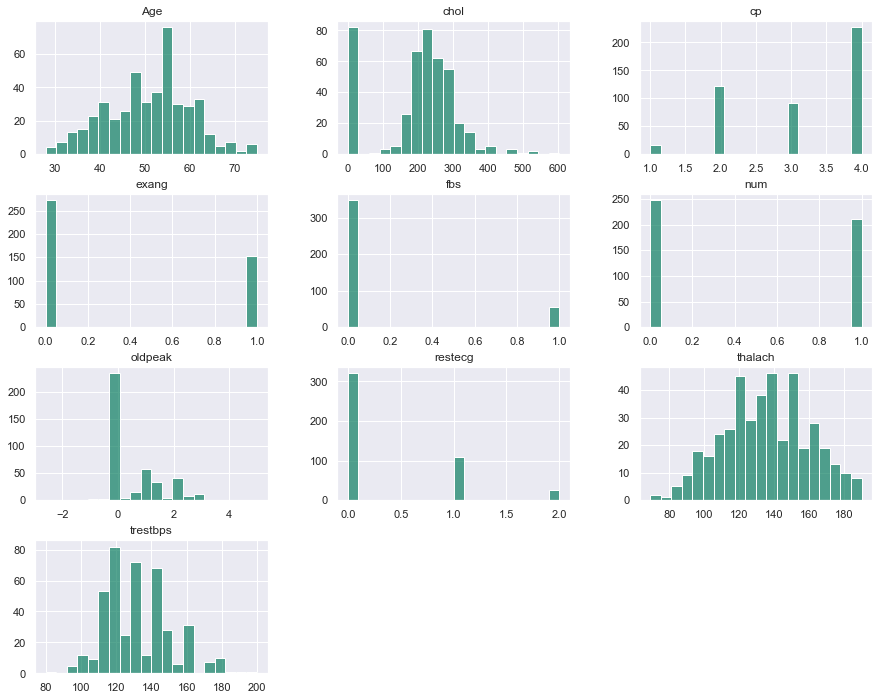

In [25]:
var_numericas.hist(figsize=(15,12), bins = 20, color="#007959AA" )
plt.title("Dsitribucion de datos")
plt.show()

# Tortas

In [146]:
print(prueba['Place'][prueba['Place'] == 'Hungary'].value_counts())

Hungary    294
Name: Place, dtype: int64


# Depuración de datos

In [147]:
# Tomanos los Dataframes Corazon (conjunto de entremaniento), prueba (conjunto de prueba)
# Formateamos los datos que esten vacios en el conjunto de entrenamiento y prueba
# hacemos copias para para entrenar el arbol de desición tomando como valor de predición
# la colomuna Num como variables objetiva para realizar la clasificación de la enfermedad cardiaca

# elimanamos los registros vacio o nulos de los conjuntos de pruebas

from sklearn.model_selection import train_test_split

Corazon = Corazon.dropna()
prueba = prueba.dropna()

prueba['Place'][prueba['Place'] == 'Hungary'] = 0
prueba['Place'][prueba['Place'] == 'Switzerland'] = 1
prueba['Place'][prueba['Place'] == 'VA'] = 2


Corazon['Place'][Corazon['Place'] == 'Hungary'] = 0
Corazon['Place'][Corazon['Place'] == 'Switzerland'] = 1
Corazon['Place'][Corazon['Place'] == 'VA'] = 2


# División de datos

In [148]:
#se Crea los areglos nummpy objetivo (unidimensional) y atributos(multidimensional).

objetivo = Corazon['num'].values
atributos = Corazon[['Age','Sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak', 'Place']].values

#se divide en 80% para entrenamiento y 20% para prueba 
trainX, testX, trainY, testY = train_test_split(atributos,objetivo, test_size = 0.2 )

# Primera predicion  con sobre ajuste

Aqui hacemos una primera predicción con árboles de desición con sobre ajuste el resultado es que da un 100%  con respecto
a la variable num

In [149]:
arbol = tree.DecisionTreeClassifier()
arbol = arbol.fit(atributos, objetivo)

print(arbol.score(atributos, objetivo))
print(arbol.feature_importances_)

1.0
[0.1375816  0.01726004 0.09391349 0.13712686 0.12738478 0.03903684
 0.03557962 0.11605823 0.24638034 0.04568063 0.00399757]


# Segunda predicción sin sobre ajuste

Aqui hacemos una segunda predicción con árboles de desición sin sobre ajuste el resultado varia en porcentaje con respecto a la variable num

In [150]:
arbol_2 =  tree.DecisionTreeClassifier(max_depth = 7, min_samples_split = 10, random_state = 1)
arbol_2 = arbol_2.fit(atributos, objetivo)

print(arbol_2.score(atributos, objetivo))

0.9005847953216374


# Prediccion datos de conjunto de entremaniento y prueba

In [151]:
arbol_3 =  tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
arbol_3 = arbol_3.fit(trainX, trainY)

# Score del conjunto de entrenamiento.
resultado1 = arbol_3.score(trainX, trainY)
print("Resultado conjunto de entrenamiento %.2f%%" % (resultado1 * 100.0))
# Score del conjunto de Pruebas
resultado2 = arbol_3.score( testX, testY)
print("Resultado del conjunto de prueba %.2f%%" % (resultado2 * 100.0))


Resultado conjunto de entrenamiento 96.70%
Resultado del conjunto de prueba 66.67%


# Modelo Naive Bayes

In [152]:
bayes = gnb.fit(trainX, trainY)

## Score del conjunto de entremaniento.
score_bayes1 = bayes.score(trainX, trainY)
print("Resultado conjunto de entrenamiento %.2f%%" % (score_bayes1 * 100.0))
# Score del conjunto de prueba
score_bayes2 = bayes.score(testX, testY)
print("Resultado del conjunto de prueba %.2f%%" % (score_bayes2 * 100.0))

Resultado conjunto de entrenamiento 79.85%
Resultado del conjunto de prueba 78.26%


# Redes Nueronales

# Red Neuronal con Sklearn

In [198]:
scaler = StandardScaler()
#hacemos una copia de trianX y testX 
train_x = trainX.copy()
test_x = testX.copy()

scaler.fit(trainX)
# aplicamos la transformaicon a trian_x y test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

neuronal_sk = MLPClassifier(hidden_layer_sizes=(11,12,8,1), activation='relu', solver='lbfgs', max_iter=5000, random_state=10)

neuronal_sk.fit(train_x, trainY) 

print("entrenamiento")
print(neuronal_sk.score(train_x, trainY))

print("prueba")
print(neuronal_sk.score(test_x, testY))



entrenamiento
0.5714285714285714
prueba
0.5362318840579711


#  Red neuronal con Keras

In [191]:
# Creamos nuestra red neuronal
red_keras = Sequential()
# se crea la primera capa con 8 entradas y 12 neuronas en la capa oculta
red_keras.add(Dense(12, input_dim=11, activation='relu'))
# segunda capa con 8 neuronas
red_keras.add(Dense(8, activation='relu'))
# capa de salida con 1 sola neurona
red_keras.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
red_keras.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ajuste del modelo keras 

In [194]:
# ajeuste del modelo
red_keras.fit(trainX, trainY, epochs=150,batch_size=10)

# Evaluación del modelo para entrenamiento
score = red_keras.evaluate(trainX, trainY)
print("\n redes entremaniento keras %s: %.2f%%" % (red_keras.metrics_names[1], score[1]*100))

# Calcular predicción
prediccion = red_keras.predict(trainX)
redon = [round(x[0]) for x in prediccion]
print(redon)

Epoch 1/150
273/273 [==============================] - 0s 744us/step - loss: 0.7597 - acc: 0.6667
Epoch 2/150
273/273 [==============================] - 0s 758us/step - loss: 0.7142 - acc: 0.6740
Epoch 3/150
273/273 [==============================] - 0s 667us/step - loss: 0.6920 - acc: 0.6886
Epoch 4/150
273/273 [==============================] - 0s 670us/step - loss: 0.6734 - acc: 0.7179
Epoch 5/150
273/273 [==============================] - 0s 993us/step - loss: 0.7292 - acc: 0.6520
Epoch 6/150
273/273 [==============================] - 0s 685us/step - loss: 0.6839 - acc: 0.6923
Epoch 7/150
273/273 [==============================] - 0s 894us/step - loss: 0.6722 - acc: 0.6813
Epoch 8/150
273/273 [==============================] - 0s 601us/step - loss: 0.6708 - acc: 0.7179
Epoch 9/150
273/273 [==============================] - 0s 579us/step - loss: 0.7069 - acc: 0.6813
Epoch 10/150
273/273 [==============================] - 0s 631us/step - loss: 0.7929 - acc: 0.6520
Epoch 11/150
273/27

Epoch 83/150
273/273 [==============================] - 0s 524us/step - loss: 0.5923 - acc: 0.7399
Epoch 84/150
273/273 [==============================] - 0s 498us/step - loss: 0.5820 - acc: 0.7509
Epoch 85/150
273/273 [==============================] - 0s 461us/step - loss: 0.6223 - acc: 0.7216
Epoch 86/150
273/273 [==============================] - 0s 476us/step - loss: 0.5461 - acc: 0.7582
Epoch 87/150
273/273 [==============================] - 0s 553us/step - loss: 0.5868 - acc: 0.7179
Epoch 88/150
273/273 [==============================] - 0s 590us/step - loss: 0.5960 - acc: 0.7399 0s - loss: 0.6538 - acc: 0.694
Epoch 89/150
273/273 [==============================] - 0s 546us/step - loss: 0.5547 - acc: 0.7436
Epoch 90/150
273/273 [==============================] - 0s 513us/step - loss: 0.5717 - acc: 0.7582
Epoch 91/150
273/273 [==============================] - 0s 711us/step - loss: 0.5862 - acc: 0.7326
Epoch 92/150
273/273 [==============================] - 0s 553us/step - loss: 

In [193]:
# Creamos nuestra red neuronal
red_keras1 = Sequential()

# se crea la primera capa con 8 entradas y 12 neuronas en la capa oculta
red_keras1.add(Dense(12, input_dim=11, activation='relu'))

# segunda capa con 8 neuronas
red_keras1.add(Dense(8, activation='relu'))

# capa de salida con 1 sola neurona
red_keras1.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
red_keras1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ajeuste del modelo
red_keras1.fit(trainX, trainY, epochs=150,batch_size=10)

# Evaluación del modelo para prueba
score = red_keras1.evaluate(testX, testY)
print("\n red Prueba keras %s: %.2f%%" % (red_keras1.metrics_names[1], score[1]*100))

# Calcular predicción
prediccion = red_keras1.predict(testX)
redon = [round(x[0]) for x in prediccion]
print(redon)

Epoch 1/150
273/273 [==============================] - 5s 19ms/step - loss: 8.0771 - acc: 0.4029
Epoch 2/150
273/273 [==============================] - 0s 510us/step - loss: 2.1779 - acc: 0.5201
Epoch 3/150
273/273 [==============================] - 0s 495us/step - loss: 1.3015 - acc: 0.6117
Epoch 4/150
273/273 [==============================] - 0s 484us/step - loss: 1.0097 - acc: 0.6410
Epoch 5/150
273/273 [==============================] - 0s 517us/step - loss: 0.8145 - acc: 0.6557
Epoch 6/150
273/273 [==============================] - 0s 465us/step - loss: 0.7384 - acc: 0.6374
Epoch 7/150
273/273 [==============================] - 0s 480us/step - loss: 0.7218 - acc: 0.6300
Epoch 8/150
273/273 [==============================] - 0s 854us/step - loss: 0.6815 - acc: 0.6484
Epoch 9/150
273/273 [==============================] - 0s 498us/step - loss: 0.6792 - acc: 0.6520
Epoch 10/150
273/273 [==============================] - 0s 469us/step - loss: 0.7350 - acc: 0.6227
Epoch 11/150
273/273

273/273 [==============================] - 0s 538us/step - loss: 0.4968 - acc: 0.7656
Epoch 84/150
273/273 [==============================] - 0s 509us/step - loss: 0.4852 - acc: 0.7692
Epoch 85/150
273/273 [==============================] - 0s 546us/step - loss: 0.5154 - acc: 0.7399
Epoch 86/150
273/273 [==============================] - 0s 572us/step - loss: 0.4883 - acc: 0.7582
Epoch 87/150
273/273 [==============================] - 0s 480us/step - loss: 0.5034 - acc: 0.7546
Epoch 88/150
273/273 [==============================] - 0s 487us/step - loss: 0.5421 - acc: 0.6996
Epoch 89/150
273/273 [==============================] - 0s 498us/step - loss: 0.5207 - acc: 0.7436 0s - loss: 0.5277 - acc: 0.739
Epoch 90/150
273/273 [==============================] - 0s 473us/step - loss: 0.5182 - acc: 0.7582
Epoch 91/150
273/273 [==============================] - 0s 528us/step - loss: 0.5684 - acc: 0.7143
Epoch 92/150
273/273 [==============================] - 0s 696us/step - loss: 0.5497 - acc:

# Matrices que Confusion 

In [199]:
# Matrix de confusion para arboles de desición

#matrix de confusión conjunto de entrenamiento
print("Conjunto de entrenamiento")
print(confusion_matrix(arbol_3.predict(trainX), trainY))

#matrix de confusión conjunto de prueba
print("Conjunto de prueba")
print(confusion_matrix(arbol_3.predict(testX), testY))


Conjunto de entrenamiento
[[150   3]
 [  6 114]]
Conjunto de prueba
[[27 13]
 [10 19]]


In [200]:
# Matrix de confusion de Bayes

# matrix de confusion de entrenamiento
print("Conjunto de entrenamiento")
print(confusion_matrix(bayes.predict(trainX), trainY))

# matrix de consfusion de prueba
print("Conjunto de prueba")
print(confusion_matrix(bayes.predict(testX), testY))

Conjunto de entrenamiento
[[124  23]
 [ 32  94]]
Conjunto de prueba
[[28  6]
 [ 9 26]]


In [202]:
# Matrix de confusion de redes neuronales sklearn

# matrix de confusion de entrenamiento
print("Conjunto de entrenamiento")
print(confusion_matrix(neuronal_sk.predict(trainX), trainY))

# matrix de consfusion de prueba
print("Conjunto de prueba")
print(confusion_matrix(neuronal_sk.predict(testX), testY))

Conjunto de entrenamiento
[[156 117]
 [  0   0]]
Conjunto de prueba
[[37 32]
 [ 0  0]]
